# Load the dataset

In [1]:
# Import necessary library
import pandas as pd

# Load the dataset from a CSV file
df = pd.read_csv("1632560262896716.csv")

# Display the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Preprocess the Data

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the 'Gender' column into numeric values (e.g., Male → 1, Female → 0)
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Standardize the numerical features to have mean 0 and standard deviation 1
scaler = StandardScaler()
df[['Age', 'Annual Income', 'Spending Score']] = scaler.fit_transform(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
)

# Select relevant features for clustering
X = df[['Gender_encoded', 'Age', 'Annual Income', 'Spending Score']]



# K-Means Clustering – Elbow Method

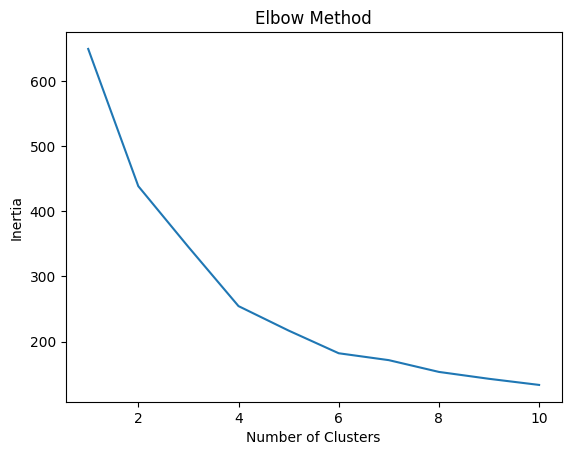

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve to visually determine the best k
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Apply K-Means and Visualize Clusters

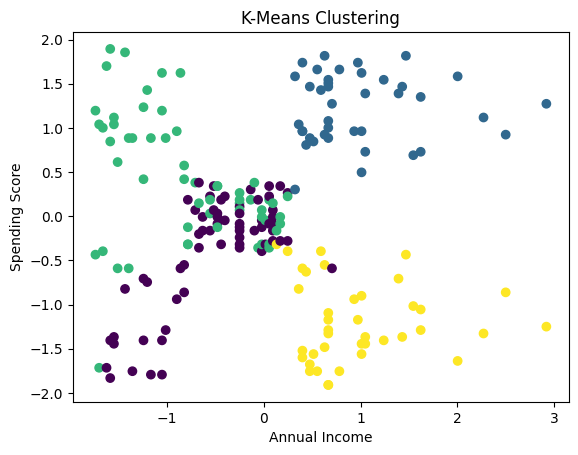

In [4]:
# Apply K-Means with a chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the resulting clusters in 2D feature space
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()


# Evaluate K-Means Clustering

In [5]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate cluster quality
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score for K-Means: {score}')


Silhouette Score for K-Means: 0.35044061449694197


# Agglomerative (Hierarchical) Clustering

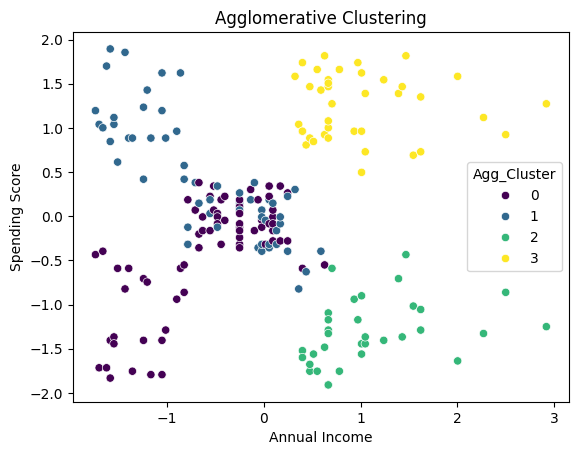

In [6]:
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

# Apply Agglomerative Clustering with the same number of clusters
agg_cluster = AgglomerativeClustering(n_clusters=4)
df['Agg_Cluster'] = agg_cluster.fit_predict(X)

# Visualize the agglomerative clustering results
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Agg_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()


# Evaluate Agglomerative Clustering

In [7]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score to evaluate the agglomerative clustering quality
score = silhouette_score(X, df['Agg_Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {score}')


Silhouette Score for Agglomerative Clustering: 0.32990525432114787


# DBSCAN Clustering

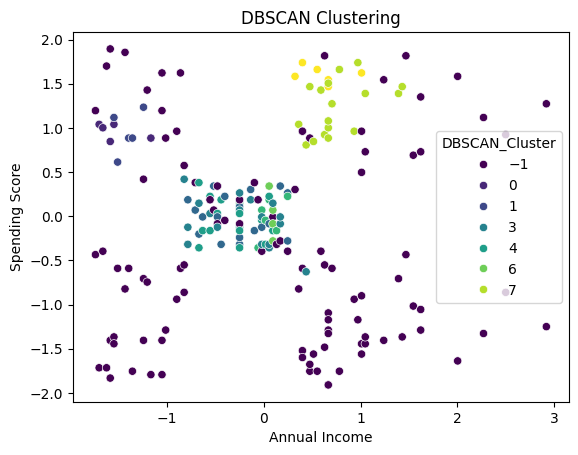

In [8]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm (density-based)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualize the DBSCAN clustering results
sns.scatterplot(x='Annual Income', y='Spending Score', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


# Evaluate DBSCAN Clustering

In [9]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score for DBSCAN clustering (note: may give errors if only one cluster)
score = silhouette_score(X, df['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN Clustering: {score}')


Silhouette Score for DBSCAN Clustering: -0.011387465358068774


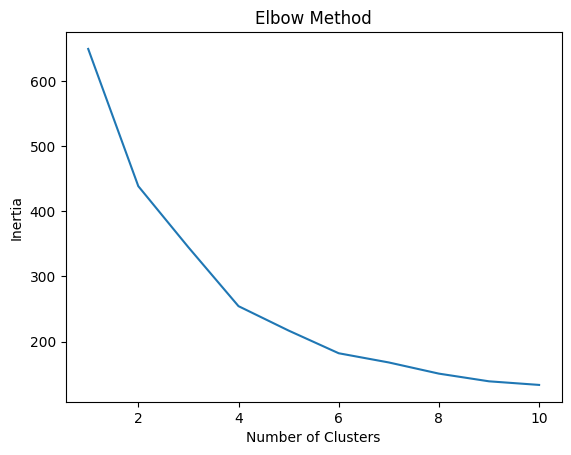

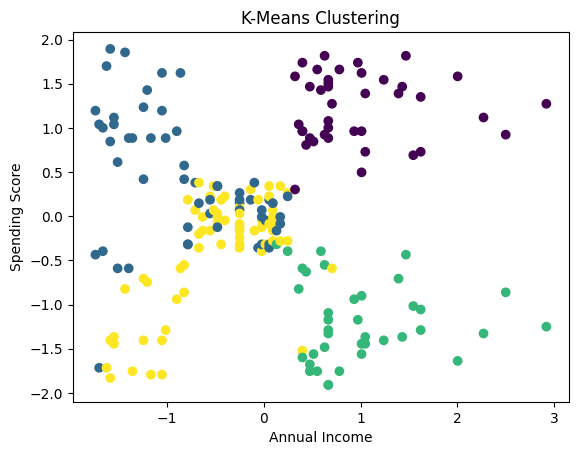

Silhouette Score for K-Means: 0.3502702043465398


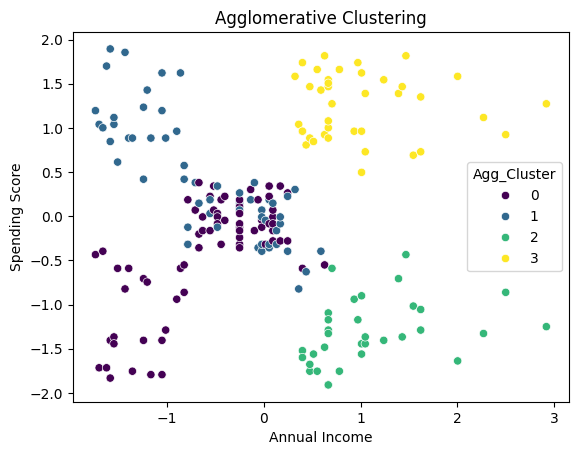

Silhouette Score for Agglomerative Clustering: 0.3299052543211478


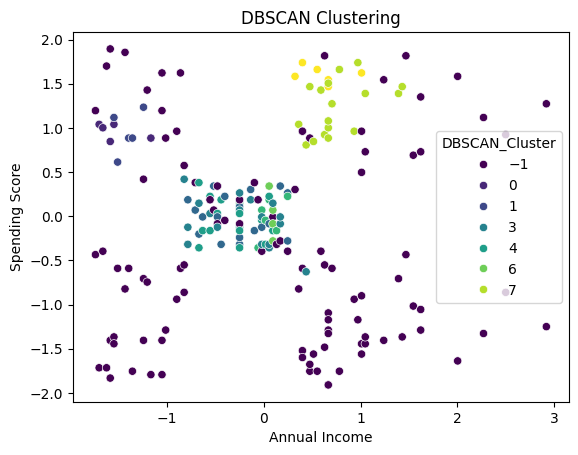

Silhouette Score for DBSCAN Clustering: -0.0113874653580688


In [10]:




# Preprocess the Data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode 'Gender' from categorical (e.g., 'Male', 'Female') to numerical (0, 1).
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])

# Normalize numerical features ('Age', 'Annual Income', 'Spending Score') using StandardScaler.
# This scales data to have zero mean and unit variance, crucial for distance-based clustering.
scaler = StandardScaler()
df[['Age', 'Annual Income', 'Spending Score']] = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Select the preprocessed features for clustering.
X = df[['Gender_encoded', 'Age', 'Annual Income', 'Spending Score']]


# KMeans Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters (k) using the Elbow Method.
# This involves fitting KMeans for a range of k values (1 to 10) and recording inertia.
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init for modern sklearn
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve: inertia vs. number of clusters.
# The 'elbow' point suggests an optimal k.
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-Means clustering with a chosen optimal k (e.g., 4 clusters based on Elbow Method observation).
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the K-Means clusters using 'Annual Income' and 'Spending Score'.
# Clusters are represented by different colors based on 'viridis' colormap.
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.show()


from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the K-Means clusters.
# This metric evaluates how similar an object is to its own cluster compared to other clusters.
score = silhouette_score(X, df['Cluster'])
print(f'Silhouette Score for K-Means: {score}')


# Hierarchical, Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns # Used for enhanced statistical data visualization

# Apply Agglomerative Clustering with 4 clusters.
agg_cluster = AgglomerativeClustering(n_clusters=4)
df['Agg_Cluster'] = agg_cluster.fit_predict(X)

# Visualize the Agglomerative clusters using Seaborn for better aesthetic control.
sns.scatterplot(x='Annual Income', y='Spending Score', hue='Agg_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()


from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the Agglomerative clusters.
score = silhouette_score(X, df['Agg_Cluster'])
print(f'Silhouette Score for Agglomerative Clustering: {score}')

# DBSCAN Clustering
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering.
# 'eps' is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# 'min_samples' is the number of samples in a neighborhood for a point to be considered as a core point.
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X)

# Visualize the DBSCAN clusters.
# Note: DBSCAN can assign -1 to noise points, which will appear as a distinct color.
sns.scatterplot(x='Annual Income', y='Spending Score', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()


from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score for the DBSCAN clusters.
# Note: Silhouette score might not be appropriate for DBSCAN if many points are labeled as noise (-1),
# as it typically expects all points to belong to a cluster.
score = silhouette_score(X, df['DBSCAN_Cluster'])
print(f'Silhouette Score for DBSCAN Clustering: {score}')